In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# for benchmarks

# on 1000 frame episodes, average of 20 episodes
soloRandomScores = {
     'Alien-v0': 163.0,'Asteroids-v0': 745.0,'Atlantis-v0': 9270.0,'BankHeist-v0': 15.5,
     'BattleZone-v0': 1450.0,'Bowling-v0': 8.05,'Boxing-v0': -3.45,'Centipede-v0': 2107.75,
     'ChopperCommand-v0': 710.0,'DoubleDunk-v0': -5.6,'FishingDerby-v0': -40.85,
     'Freeway-v0': 0.0,'Frostbite-v0': 67.5,'Gravitar-v0': 180.0,'Hero-v0': 533.25,
     'IceHockey-v0': -2.7,'Jamesbond-v0': 27.5,'Kangaroo-v0': 60.0,'Krull-v0': 639.45,
     'KungFuMaster-v0': 440.0,'MsPacman-v0': 188.5,'PrivateEye-v0': 25.0,
     'RoadRunner-v0': 15.0, 'Skiing-v0': 0, 'Tennis-v0': -10.5,'TimePilot-v0': 520.0,
     'UpNDown-v0': 400.5,'Venture-v0': 0.0,'WizardOfWor-v0': 335.0,'Zaxxon-v0': 20.0}

soloTpgScores = {
     'Alien-v0': 3382.7,'Asteroids-v0': 3050.7,'Atlantis-v0': 89653,'BankHeist-v0': 1051,
     'BattleZone-v0': 47233.4,'Bowling-v0': 223.7,'Boxing-v0': 76.5,'Centipede-v0': 34731.7,
     'ChopperCommand-v0': 7070,'DoubleDunk-v0': 2,'FishingDerby-v0': 49,
     'Freeway-v0': 28.9,'Frostbite-v0': 8144.4,'Gravitar-v0': 786.7,'Hero-v0': 16545.4,
     'IceHockey-v0': 10,'Jamesbond-v0': 3120,'Kangaroo-v0': 14780,'Krull-v0': 12850.4,
     'KungFuMaster-v0': 43353.4,'MsPacman-v0': 5156,'PrivateEye-v0': 15028.3,
     'RoadRunner-v0': 17410, 'Skiing-v0': 0, 'Tennis-v0': 1,'TimePilot-v0': 13540,
     'RoadRunner-v0': 17410,'Tennis-v0': 0,'TimePilot-v0': 13540,
     'UpNDown-v0': 34416,'Venture-v0': 576.7,'WizardOfWor-v0': 5196.7,'Zaxxon-v0': 6233.4}

/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars


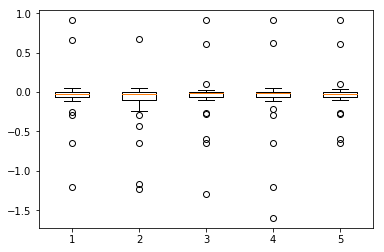

In [34]:
df = pd.read_csv('30-noshrink.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==675]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,34):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

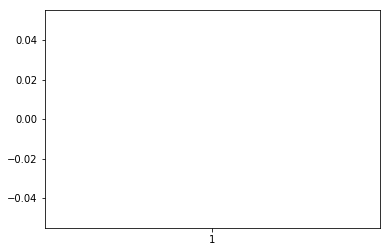

In [35]:
df = pd.read_csv('30-shrink.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==675]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,34):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

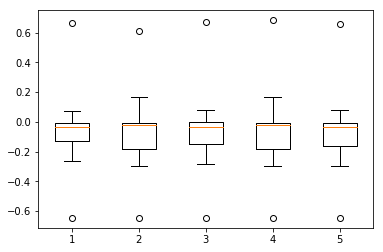

In [43]:
df = pd.read_csv('15-noshrink.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==675]

df.head()

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

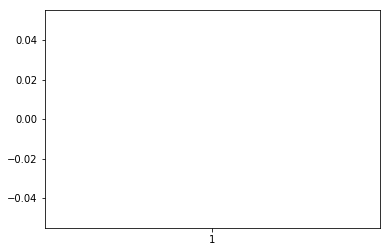

In [37]:
df = pd.read_csv('15-shrink.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==675]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

[[]]